In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as scipy
from scipy import signal
from scipy.signal import lfilter
from scipy.signal import savgol_filter

## Original Data

In [16]:
begin = 0
end = 10*np.pi
x = np.arange(begin, end, 0.1)
amplitude = 10
y = amplitude*np.sin(x)

## Adding salt pepper noise


In [17]:

number_of_salt_pepper_noise = 20
mu = 0
sigma = 10


salt_pepper_noise_indexes = np.random.uniform(
    low=0, high=len(x), size=number_of_salt_pepper_noise).astype(int)
salt_pepper_noise = np.random.normal(
    mu, sigma, size=number_of_salt_pepper_noise)


y_salt_pepper_noise = y.copy()

y_salt_pepper_noise[salt_pepper_noise_indexes] = salt_pepper_noise + \
    y_salt_pepper_noise[salt_pepper_noise_indexes]




## Adding gaussian noise


In [18]:

sigma = 1
gaussian_noise = np.random.normal(mu, sigma, size=len(x))
y_salt_pepper_noise_gaussian_noise = y_salt_pepper_noise+gaussian_noise




In [19]:
################ removing salt pepper noise ###############


y_salt_pepper_noise_gaussian_noise_filtered = scipy.signal.medfilt(
    y_salt_pepper_noise_gaussian_noise, kernel_size=5)

################ removing gaussian noise by applying low path filter  ###############

n = 20  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
y_salt_pepper_noise_gaussian_noise_smoothed_lfilter = lfilter(
    b, a, y_salt_pepper_noise_gaussian_noise)

################ removing gaussian noise by applying rolling sum  ###############

# y_salt_pepper_noise_gaussian_noise_smoothed_rolling_sum = pd.Series(
#     y_salt_pepper_noise_gaussian_noise).rolling(window=10).sum()

y_salt_pepper_noise_gaussian_noise_smoothed_rolling_mean = pd.Series(
    y_salt_pepper_noise_gaussian_noise).rolling(window=10).mean()


################ removing gaussian noise by applying Savitzky-Golay filter  ###############

y_salt_pepper_noise_gaussian_noise_smoothed_savgol_filter = savgol_filter(
    y_salt_pepper_noise_gaussian_noise_filtered, window_length=20, polyorder=2)




## Plotting


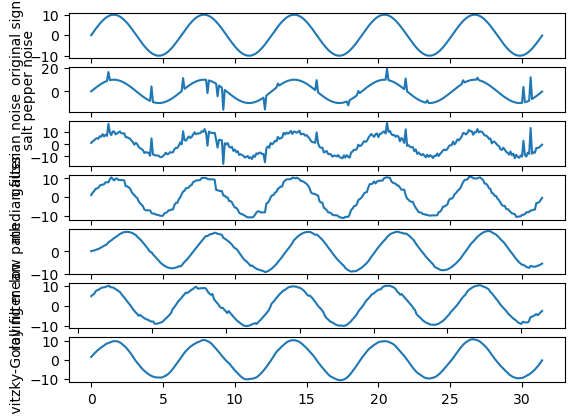

In [20]:

fig, ax = plt.subplots(nrows=7, ncols=1)
ax[0].plot(x, y)
ax[0].set_ylabel('original signal')


ax[1].plot(x, y_salt_pepper_noise)
ax[1].set_ylabel('salt pepper noise')


ax[2].plot(x, y_salt_pepper_noise_gaussian_noise)
ax[2].set_ylabel('gaussian noise')


ax[3].plot(x, y_salt_pepper_noise_gaussian_noise_filtered)
ax[3].set_ylabel('median filter')


ax[4].plot(x, y_salt_pepper_noise_gaussian_noise_smoothed_lfilter)
ax[4].set_ylabel('low path')


ax[5].plot(x, y_salt_pepper_noise_gaussian_noise_smoothed_rolling_mean)
ax[5].set_ylabel('rolling mean')


ax[6].plot(x, y_salt_pepper_noise_gaussian_noise_smoothed_savgol_filter)
ax[6].set_ylabel('Savitzky-Golay filter')

plt.show()


Refs: [1](https://stackoverflow.com/questions/37598986/reducing-noise-on-data), [2](https://sparkbyexamples.com/pandas/pandas-rolling-sum/), [3](https://medium.com/@teamastertoast/smoothing-time-series-in-python-a-walkthrough-with-covid-19-data-b4ccfb980a61)